In [1]:
from keras.callbacks import EarlyStopping
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.layers import *
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import Dense
from keras.models import Sequential
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
import math
from functions import split_dataset_LSTM
%matplotlib inline

In [2]:
df = pd.read_csv("datasets/nasd_input.csv", header=None, sep='\t')
print("Number of rows and columns:", df.shape)
# df.head(5)

Number of rows and columns: (100, 731)


In [3]:
# Creating a data structure with 60 time-steps and 1 output
look_back = 60
sc = MinMaxScaler(feature_range=(0, 1))
X_train, y_train, X_test, train_size = split_dataset_LSTM(df, 0, 0.7, sc, look_back)

print(X_train.shape)
print(X_test.shape)

(450, 60, 1)
(220, 60, 1)


In [4]:
model = Sequential()
# Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units=50, return_sequences=True,
          input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units=50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units=1))

# Compiling the RNN
model.compile(optimizer='adam', loss='mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
15/15 [==============================] - 1s 81ms/step - loss: 0.1131
Epoch 2/10
15/15 [==============================] - 1s 70ms/step - loss: 0.0253
Epoch 3/10
15/15 [==============================] - 1s 69ms/step - loss: 0.0190
Epoch 4/10
15/15 [==============================] - 1s 70ms/step - loss: 0.0159
Epoch 5/10
15/15 [==============================] - 1s 71ms/step - loss: 0.0151
Epoch 6/10
15/15 [==============================] - 1s 70ms/step - loss: 0.0162
Epoch 7/10
15/15 [==============================] - 1s 72ms/step - loss: 0.0135
Epoch 8/10
15/15 [==============================] - 1s 76ms/step - loss: 0.0150
Epoch 9/10
15/15 [==============================] - 1s 75ms/step - loss: 0.0130
Epoch 10/10
15/15 [==============================] - 2s 112ms/step - loss: 0.0129


In [5]:
# Getting the predicted stock price
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

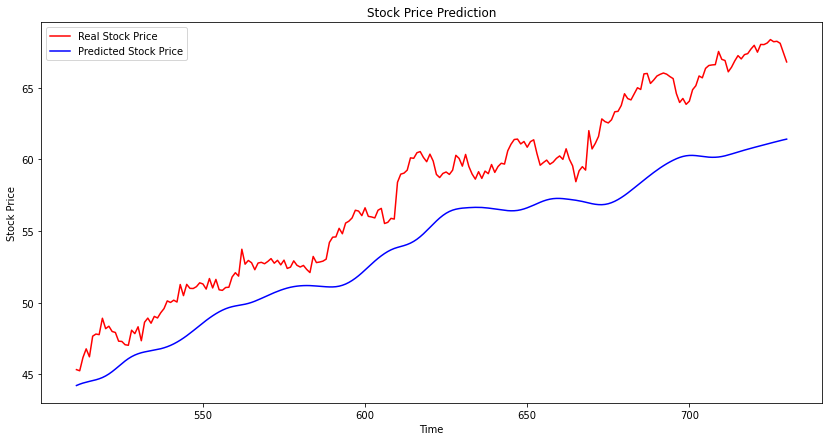

In [6]:
time_array = np.array([x for x in range(len(df.columns))])
df2 = pd.DataFrame(time_array)

# Visualising the results
plt.figure(figsize=(14, 7))
plt.plot(df2.iloc[train_size:].values, df.iloc[0, train_size:].values,
         color='red', label='Real Stock Price')
plt.plot(df2.iloc[train_size:].values, predicted_stock_price,
         color='blue', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()